In [6]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, XGBRegressor

In [7]:
# Load Cleaned Data
df = pd.read_csv("../notebook/data/cleaned_data.csv")


In [8]:
# Define Target Columns
y_reg = df['shares']
y_clf = df['popular']
X = df.drop(columns=['shares', 'popular', 'url'], errors='ignore')


In [6]:

# One-hot Encode Publish Day
X = pd.get_dummies(X, columns=['publish_day'], drop_first=True)

In [7]:
# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-Test Split
X_train, X_test, y_train_clf, y_test_clf = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

In [9]:
# Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [10]:
# Regression Models
reg_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42)
}

In [11]:
# Evaluate Regression
for name, model in reg_models.items():
    scores = cross_val_score(model, X_scaled, y_reg, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores)
    print(f"\n{name} Mean RMSE: {rmse.mean():.2f}")


Linear Regression Mean RMSE: 2889.82

Random Forest Mean RMSE: 1788.58

XGBoost Regressor Mean RMSE: 1817.36


In [12]:
# Classification Models
clf_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [13]:
# Evaluate Classification
for name, model in clf_models.items():
    model.fit(X_train, y_train_clf)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test_clf, y_pred):.4f}")
    print(classification_report(y_test_clf, y_pred))


Random Forest Accuracy: 0.6593
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      4072
           1       0.64      0.58      0.61      3457

    accuracy                           0.66      7529
   macro avg       0.66      0.65      0.65      7529
weighted avg       0.66      0.66      0.66      7529



c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:08:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Classifier Accuracy: 0.6430
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      4072
           1       0.62      0.58      0.60      3457

    accuracy                           0.64      7529
   macro avg       0.64      0.64      0.64      7529
weighted avg       0.64      0.64      0.64      7529



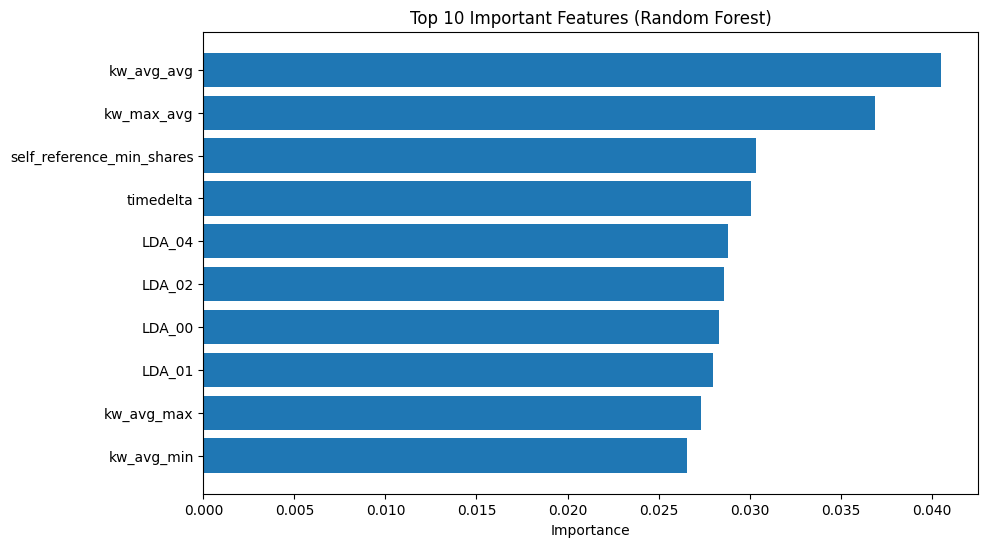

In [14]:
# Feature Importance (Example: Random Forest)
rf = clf_models["Random Forest"]
importances = rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.show()